In [ ]:
#uncomment the following when using Colab or Kaggle
# !git clone https://github.com/MathiasKraus/neural_network_course_WS2425
# !pip install lightning
# !pip install torchmetrics[detection]

# when using Colab or Kaggle, also change 
# from data import ...
# to 
# from neural_network_course_WS2425.data import ...
# The same needs to be done for model and helper

In [1]:
import torch
import torch.nn.functional as F
from lightning.pytorch import Trainer

from model import ObjectDetector
from data import VOCDataModule
from helper import show_image_and_bounding_box, MyProgressBar, get_sample, convert_predictions_bboxes

torch.set_float32_matmul_precision('medium')

/home/krm05476/anaconda3/envs/neural-network-course/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Step 1: We need to download an annotated dataset including images and classes and build a data module
data_module = VOCDataModule(data_dir='data/VOC', batch_size=16, image_size=(64, 64))

# Step 2: We use a pretrained vision model from torchvision
model = ObjectDetector(num_classes=21)

# Step 3: Train Model
trainer = Trainer(max_epochs=1, callbacks=[MyProgressBar()])
trainer.fit(model, data_module)

/home/krm05476/anaconda3/envs/neural-network-course/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/krm05476/anaconda3/envs/neural-network-course/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_MobileNet_V3_Large_320_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_MobileNet_V3_Large_320_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Using downloaded and verified file: data/VOC/VOCtrainval_06-Nov-2007.tar
Extracting data/VOC/VOCtrainval_06-Nov-2007.tar to data/VOC


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name           | Type                 | Params | Mode 
----------------------------------------------------------------
0 | model          | FasterRCNN           | 19.0 M | train
1 | val_map_metric | MeanAveragePrecision | 0      | train
----------------------------------------------------------------
19.0 M    Trainable params
58.9 K    Non-trainable params
19.0 M    Total params
76.110    Total estimated model params size (MB)


Epoch 0: 100%|████████████████████████████████| 157/157 [00:31<00:00,  5.05it/s, v_num=50, val_map=0.00504]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 0: 100%|████████████████████████████████| 157/157 [00:31<00:00,  5.02it/s, v_num=50, val_map=0.00504]


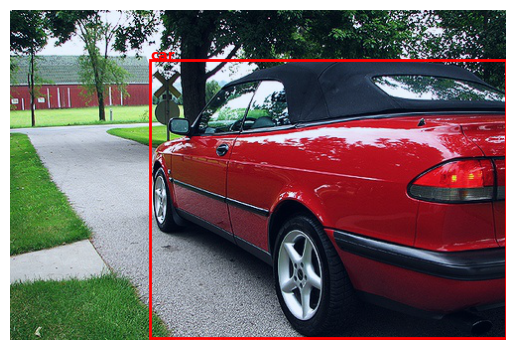

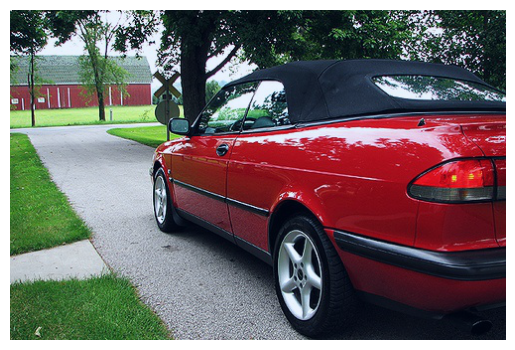

In [3]:
# Step 1: Get samples
image, bbox = get_sample(data_module, val=True, idx=1)

# Step 2: Show labels (true bboxes)
show_image_and_bounding_box(image, bbox['annotation']['object'])

# Step 3: Make predictions with our neural network
pred = model.predict(image.unsqueeze(0))

# Step 4: Show predicted bboxes on image
idx_to_class = data_module.get_idx_to_class()
converted_predictions = convert_predictions_bboxes(pred, idx_to_class, threshold=0.15)
show_image_and_bounding_box(image, converted_predictions)